# pySAM by Organized Simulations

Runs all combinations in orga, for the 4 rows
Calcualtes RMSE & MBD, relative and absolutes

In [1]:
# Written for nrel-pysam 3.0.2
import PySAM.Pvsamv1 as PV
import PySAM.Grid as Grid
import PySAM.Utilityrate5 as UtilityRate
import PySAM.Cashloan as Cashloan
import pathlib
import json
import os

sif2 = 'Row2Json'
sif4 = 'Row4Json'
sif8 = 'Row8Json'
sif9 = 'Row9Json'

jsonnames = ['Row2PrismBifi', 'Row4LongiBifi', 'Row8MONOFACIALReference', 'Row9Sunpreme']

In [2]:
file_names = ["pvsamv1", "grid", "utilityrate5", "cashloan"]

pv2 = PV.new()  # also tried PVWattsSingleOwner
grid2 = Grid.from_existing(pv2)
so2 = Cashloan.from_existing(grid2, 'FlatPlatePVCommercial')
ur2 = UtilityRate.from_existing(pv2)


pv4 = PV.new()  # also tried PVWattsSingleOwner
grid4 = Grid.from_existing(pv4)
so4 = Cashloan.from_existing(grid4, 'FlatPlatePVCommercial')
ur4 = UtilityRate.from_existing(pv4)


pv8 = PV.new()  # also tried PVWattsSingleOwner
grid8 = Grid.from_existing(pv8)
so8 = Cashloan.from_existing(grid8, 'FlatPlatePVCommercial')
ur8 = UtilityRate.from_existing(pv8)


pv9 = PV.new()  # also tried PVWattsSingleOwner
grid9 = Grid.from_existing(pv9)
so9 = Cashloan.from_existing(grid9, 'FlatPlatePVCommercial')
ur9 = UtilityRate.from_existing(pv9)


In [3]:
for count, module in enumerate([pv2, grid2, ur2, so2]):
    filetitle= 'Row2PrismBifi' + '_' + file_names[count] + ".json"
    with open(os.path.join(sif2,filetitle), 'r') as file:
        data = json.load(file)
        for k, v in data.items():
            if k == 'number_inputs':
                continue
            try:
                module.value(k, v)
            except AttributeError:
                # there is an error is setting the value for ppa_escalation
                print(module, k, v)

In [4]:
for count, module in enumerate([pv4, grid4, ur4, so4]):
    filetitle= 'Row4LongiBifi' + '_' + file_names[count] + ".json"
    with open(os.path.join(sif4,filetitle), 'r') as file:
        data = json.load(file)
        for k, v in data.items():
            if k == 'number_inputs':
                continue
            try:
                module.value(k, v)
            except AttributeError:
                # there is an error is setting the value for ppa_escalation
                print(module, k, v)

In [5]:
for count, module in enumerate([pv8, grid8, ur8, so8]):
    filetitle= 'Row8MONOFACIALReference' + '_' + file_names[count] + ".json"
    with open(os.path.join(sif8,filetitle), 'r') as file:
        data = json.load(file)
        for k, v in data.items():
            if k == 'number_inputs':
                continue
            try:
                module.value(k, v)
            except AttributeError:
                # there is an error is setting the value for ppa_escalation
                print(module, k, v)

In [6]:
for count, module in enumerate([pv9, grid9, ur9, so9]):
    filetitle= 'Row9Sunpreme' + '_' + file_names[count] + ".json"
    with open(os.path.join(sif9,filetitle), 'r') as file:
        data = json.load(file)
        for k, v in data.items():
            if k == 'number_inputs':
                continue
            try:
                module.value(k, v)
            except AttributeError:
                # there is an error is setting the value for ppa_escalation
                print(module, k, v)

##### Sanity checks

In [7]:
pv2.SolarResource.solar_resource_file
pv2.SolarResource.use_wf_albedo
pv2.SolarResource.irrad_mode
pv2.SolarResource.albedo

(0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224,
 0.20000000298023224)

# LOOP THROUGH COMBOS

In [8]:
import pandas as pd

In [9]:
# 2-Bifi: Prism 457cBSTC
# 4-Bifi: LONGi Green Energy Technology Co._Ltd. LR6-72PH-370M
# 9-Bifi: Sunpreme Inc. SNPM-HxB-400

In [10]:
# For unknown reasons, pySAM does not calculate this number and you have to obtain it from the GUI.

system_capacity2 =  72.04280090332031   
system_capacity4 = 73.982               
system_capacity8 = 71.078
system_capacity9 = 80.089

In [11]:
orga = pd.read_excel('..\Combinations.xlsx', skiprows = 20)
orga.fillna(method='ffill')

,Method,Sim,WeatherFile_Name,NOTES,DNI,DHI,GHI,POA,BOA,POABOA,...,AmbientTemperature,TrackerAngle,irrad_mod,sky_model,Module,Module Temperature,TestPOA,TestBOA,TestModuleTemp,TestPerformance
0,1,00,00,baseline,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
1,1,A01,A01,Test Albedo,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
2,1,A02,A02,Test Albedo,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
3,1,A03,A03,Test Albedo,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
4,1,A04,A04,Test Albedo,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,Yes,Yes,Yes,Yes
5,1,W01,W01,Test Wind Speed,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,-,-,Yes,Yes
6,1,W02,W02,Test Wind Speed,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,-,-,Yes,Yes
7,1,W03,W03,Test Wind Speed,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,0,0,0,2,All tree,NaN,-,-,Yes,Yes
8,1,T01,T01,Test Temperature,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,1,0,0,2,All tree,NaN,-,-,Yes,Yes
9,1,T02,T02,Test Temperature,SRRL_DNI,SRRL_DHI,SRRL_GHI,0,0,0,...,2,0,0,2,All tree,NaN,-,-,Yes,Yes


In [14]:
InputFilesFolder = r'..\InputFiles'
ResultsFolder = r'..\SAM\Results'

In [21]:
dfAll = pd.DataFrame()

for ii in range(0, len(orga)): # loop here over all the weather files or sims.

    print(ii)
    weatherfile = os.path.join(InputFilesFolder,'WF_SAM_'+orga.loc[ii]['WeatherFile_Name']+'.csv')
    savefilevar = os.path.join(ResultsFolder,'Results_pySAM_'+orga.loc[ii]['Sim']+'.csv')

#    POABOA = orga.loc[ii]['POABOA']
    irrad_mod = orga.loc[ii]['irrad_mod']
    sky_model = orga.loc[ii]['sky_model']

    # Change Weather File here
    pv2.SolarResource.solar_resource_file = weatherfile
    pv4.SolarResource.solar_resource_file = weatherfile
    pv8.SolarResource.solar_resource_file = weatherfile
    pv9.SolarResource.solar_resource_file = weatherfile
    
    pv2.SolarResource.sky_model = orga.loc[ii]['sky_model']
    pv2.SolarResource.irrad_mode = orga.loc[ii]['irrad_mod']
    pv4.SolarResource.sky_model = orga.loc[ii]['sky_model']
    pv4.SolarResource.irrad_mode = orga.loc[ii]['irrad_mod']
    pv8.SolarResource.sky_model = orga.loc[ii]['sky_model']
    pv8.SolarResource.irrad_mode = orga.loc[ii]['irrad_mod']
    pv9.SolarResource.sky_model = orga.loc[ii]['sky_model']
    pv9.SolarResource.irrad_mode = orga.loc[ii]['irrad_mod']
    
    grid2.SystemOutput.gen = [0] * 8760  # p_out   # let's set all the values to 0
    pv2.execute()
    grid2.execute()
    ur2.execute()
    so2.execute()

    grid4.SystemOutput.gen = [0] * 8760  # p_out   # let's set all the values to 0
    pv4.execute()
    grid4.execute()
    ur4.execute()
    so4.execute()

    grid8.SystemOutput.gen = [0] * 8760  # p_out   # let's set all the values to 0
    pv8.execute()
    grid8.execute()
    ur8.execute()
    so8.execute()

    grid9.SystemOutput.gen = [0] * 8760  # p_out   # let's set all the values to 0
    pv9.execute()
    grid9.execute()
    ur9.execute()
    so9.execute()

    # SAVE RESULTS|
    # I usually save 1 all the data for 1 of the simulations, and all the others save just the main ones we need like DCP, temp. and front/rear irradiance.

    results = pv2.Outputs.export()
    power2 = list(results['subarray1_dc_gross']) # normalizing by the system_capacity
    celltemp2 = list(results['subarray1_celltemp'])
    rear2 = list(results['subarray1_poa_rear'])
    front2 = list(results['subarray1_poa_front'])

    results = pv4.Outputs.export()
    power4 = list(results['subarray1_dc_gross']) # normalizing by the system_capacity
    celltemp4 = list(results['subarray1_celltemp'])
    rear4 = list(results['subarray1_poa_rear'])
    front4 = list(results['subarray1_poa_front'])

    results = pv8.Outputs.export()
    power8 = list(results['subarray1_dc_gross']) # normalizing by the system_capacity
    celltemp8 = list(results['subarray1_celltemp'])
    #rear8 = list(results['subarray1_poa_rear'])
    front8 = list(results['subarray1_poa_front'])
    
    results = pv9.Outputs.export()
    power9 = list(results['subarray1_dc_gross']) # normalizing by the system_capacity
    celltemp9 = list(results['subarray1_celltemp'])
    rear9 = list(results['subarray1_poa_rear'])
    front9 = list(results['subarray1_poa_front'])
    
    simtyp = [orga.loc[ii]['Sim']] * 8760

    res = pd.DataFrame(list(zip(simtyp, power2, celltemp2, rear2, front2,
                               power4, celltemp4, rear4, front4,
                               power8, celltemp8, front8,
                                power9, celltemp9, rear9, front9)),
           columns = ['Sim', 'Power2' , 'CellTemp2', 'Rear2', 'Front2',
                     'Power4' , 'CellTemp4', 'Rear4', 'Front4',
                     'Power8' , 'CellTemp8', 'Front8',
                     'Power9' , 'CellTemp9', 'Rear9', 'Front9'])

    res = res[0:8760]
    res['index'] = res.index
    res['Power2']= res['Power2']/system_capacity2 # normalizing by the system_capacity
    res['Power4']= res['Power4']/system_capacity4 # normalizing by the system_capacity
    res['Power8']= res['Power8']/system_capacity8 # normalizing by the system_capacity
    res['Power9']= res['Power9']/system_capacity9 # normalizing by the system_capacity

#    res.index = timestamps
    res.to_csv(savefilevar, float_format='%g')
    dfAll = pd.concat([dfAll, res], ignore_index=True, axis=0)
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [16]:
dfAll.keys()

Index(['Sim', 'Power2', 'CellTemp2', 'Rear2', 'Front2', 'Power4', 'CellTemp4',
       'Rear4', 'Front4', 'Power8', 'CellTemp8', 'Front8', 'Power9',
       'CellTemp9', 'Rear9', 'Front9', 'index'],
      dtype='object')

In [17]:
dfAll.to_pickle('Results_pysam.pkl')


In [38]:
fielddataFolder = '..\FieldData'

try:
    data = pd.read_pickle(os.path.join(fielddataFolder,'DATA_Release.pickle'))
except AttributeError:
    raise Exception('Error: pandas needs to be >= 1.5.0 to read this pickle file')
        
print("Clean pickle loaded for Plotting Production Data, # datapoints: ", data.__len__())
print("Spanning from", data.index[0], " to ", data.index[-1])

filterdates = (data.index >= '2021-06-01')  & (data.index < '2022-06-01') 
data = data[filterdates].resample('60T', label='left', closed='left').mean().copy()


Clean pickle loaded for Plotting Production Data, # datapoints:  1665830
Spanning from 2019-07-01 00:02:00-07:00  to  2022-09-07 23:20:00-07:00


In [39]:
# FRONT POA
#1
data['rowGfront_IMT_Average'] = data[['row3Gfront', 'row2Gfront', 'row5Gfront', 'row7Gfront', 'row9Gfront']].mean(axis=1)

# 9 --> NOTE: INCLUDED ROTATING ALBEDOMETER
data['rowGfront_ALL_Averages'] = data[['row3Gfront', 'row2Gfront', 'row3Gfront_CM11', 'row3Gfront_Licor',
                                      'row5Gfront', 'row7Gfront', 'row9Gfront', 'row7RotatingAlbedometer_CM11_Up']].mean(axis=1)

#10  --> NOTE: INCLUDED ROTATING ALBEDOMETER
data['rowGfront_Broadband_Averages'] = data[['row3Gfront_CM11', 'row3Gfront_Licor', 'row7RotatingAlbedometer_CM11_Up']].mean(axis=1)

# REAR POA

#0
data['row3Grear_IMT_Averages'] = data[['row3Grear_IMT_West', 'row3Grear_IMT_CenterWest', 
                                      'row3Grear_IMT_CenterEast', 'row3Grear_IMT_East']].mean(axis=1)

#14
data['rowGrear_IMT_Averages'] = data[['row3Grear_IMT_West', 'row3Grear_IMT_CenterWest', 
                                      'row3Grear_IMT_CenterEast', 'row3Grear_IMT_East',
                                     'row5Grear', 'row7Grear', 'row7Grear_IMT_CenterEast', 'row7Grear_IMT_East']].mean(axis=1)

#15  --> NOTE: DID NOT INCLUDE ROTATING ALBEDOMETER
data['rowGrear_ALL_Averages'] = data[['row3Grear_IMT_West', 'row3Grear_IMT_CenterWest', 
                                      'row3Grear_IMT_CenterEast', 'row3Grear_IMT_East',
                                     'row5Grear', 'row7Grear', 'row7Grear_IMT_CenterEast', 'row7Grear_IMT_East',
                                     'row3Grear_CM11', 'row3Grear_Licor']].mean(axis=1)

data['rowGrear_Broadband_Averages'] = data[['row3Grear_CM11', 'row3Grear_Licor']].mean(axis=1)


# WIND
data['rowFieldWindSpeedAverage'] = data[['row7wind_speed','row2wind_speed']].mean(axis=1)


# ALBEDO BASELINE..?

data['sunkity_CM11_GRI_over_SRRL_GHI'] = data['sunkitty_GRI_CM22'] / data['SRRL_GHI']

In [41]:
import bifacial_radiance as br


In [47]:
df = dfAll.copy()

In [84]:
# br.performance.MBD("meas", "model")
MBD_power2 = []
MBD_power4 = []
MBD_power8 = []
MBD_power9 = []

MBD_Gfront2 = []
MBD_Gfront4 = []
MBD_Gfront8 = []
MBD_Gfront9 = []

MBD_Grear2 = []
MBD_Grear4 = []
MBD_Grear9 = []

MBD_Modtemp2 = []
MBD_Modtemp4 = []
MBD_Modtemp8 = []
MBD_Modtemp9 = []

sim_all = []  

SimsM1 = orga.loc[orga['Method']==1]['Sim']

for sim in SimsM1:
    modper2 = df.loc[df['Sim'] == sim]['Power2'].values
    modfront2 = df.loc[df['Sim'] == sim]['Front2'].values
    modrear2  = df.loc[df['Sim'] == sim]['Rear2'].values
    modtemp2  = df.loc[df['Sim'] == sim]['CellTemp2'].values
    
    modper4 = df.loc[df['Sim'] == sim]['Power4'].values
    modfront4 = df.loc[df['Sim'] == sim]['Front4'].values
    modrear4  = df.loc[df['Sim'] == sim]['Rear4'].values
    modtemp4  = df.loc[df['Sim'] == sim]['CellTemp4'].values
    
    modper8 = df.loc[df['Sim'] == sim]['Power8'].values
    modfront8 = df.loc[df['Sim'] == sim]['Front8'].values
    modtemp8  = df.loc[df['Sim'] == sim]['Power8'].values
    
    modper9 = df.loc[df['Sim'] == sim]['Power9'].values
    modfront9 = df.loc[df['Sim'] == sim]['Front9'].values
    modrear9  = df.loc[df['Sim'] == sim]['Rear9'].values
    modtemp9  = df.loc[df['Sim'] == sim]['CellTemp9'].values
    
    measfront  = data.row3Gfront
    measrear  = data.row3Grear_IMT_Averages
    meastemp = data.row2tmod_1


    sim_all.append(sim)

    MBD_power2.append(br.performance.MBD(data.PR2, modper2)) 
    MBD_power4.append(br.performance.MBD(data.PR4, modper4))
    MBD_power8.append(br.performance.MBD(data.PR8, modper8))
    MBD_power9.append(br.performance.MBD(data.PR9, modper9))
    
    MBD_Gfront2.append(br.performance.MBD(measfront, modfront2)) 
    MBD_Gfront4.append(br.performance.MBD(measfront, modfront4))
    MBD_Gfront8.append(br.performance.MBD(measfront, modfront8))
    MBD_Gfront9.append(br.performance.MBD(measfront, modfront9))

    MBD_Grear2.append(br.performance.MBD(measrear, modrear2))
    MBD_Grear4.append(br.performance.MBD(measrear, modrear4))
    MBD_Grear9.append(br.performance.MBD(measrear, modrear9))

    MBD_Modtemp2.append(br.performance.MBD(meastemp, modtemp2))
    MBD_Modtemp4.append(br.performance.MBD(meastemp, modtemp4))
    MBD_Modtemp8.append(br.performance.MBD(meastemp, modtemp8))
    MBD_Modtemp9.append(br.performance.MBD(meastemp, modtemp9))
    
MBDres = pd.DataFrame(list(zip(sim_all, MBD_power2, MBD_power4, MBD_power8, MBD_power9,
                               MBD_Gfront2, MBD_Gfront4, MBD_Gfront8, MBD_Gfront9,
                               MBD_Grear2, MBD_Grear4, MBD_Grear9,
                                MBD_Modtemp2, MBD_Modtemp4, MBD_Modtemp8, MBD_Modtemp9)),
           columns = ['Sim', 'MBD_power2' , 'MBD_power4', 'MBD_power8', 'MBD_power9',
                     'MBD_Gfront2' , 'MBD_Gfront4', 'MBD_Gfront8', 'MBD_Gfront9',
                     'MBD_Grear2' , 'MBD_Grear4', 'MBD_Grear9',
                     'MBD_Modtemp2' , 'MBD_Modtemp4', 'MBD_Modtemp8', 'MBD_Modtemp9'])


In [85]:
# br.performance.MBD("meas", "model")
MBD_power2 = []
MBD_power4 = []
MBD_power8 = []
MBD_power9 = []

MBD_Gfront2 = []
MBD_Gfront4 = []
MBD_Gfront8 = []
MBD_Gfront9 = []

MBD_Grear2 = []
MBD_Grear4 = []
MBD_Grear9 = []

MBD_Modtemp2 = []
MBD_Modtemp4 = []
MBD_Modtemp8 = []
MBD_Modtemp9 = []

sim_all = []  

SimsM1 = orga.loc[orga['Method']==1]['Sim']

for sim in SimsM1:
    modper2 = df.loc[df['Sim'] == sim]['Power2'].values
    modfront2 = df.loc[df['Sim'] == sim]['Front2'].values
    modrear2  = df.loc[df['Sim'] == sim]['Rear2'].values
    modtemp2  = df.loc[df['Sim'] == sim]['CellTemp2'].values
    
    modper4 = df.loc[df['Sim'] == sim]['Power4'].values
    modfront4 = df.loc[df['Sim'] == sim]['Front4'].values
    modrear4  = df.loc[df['Sim'] == sim]['Rear4'].values
    modtemp4  = df.loc[df['Sim'] == sim]['CellTemp4'].values
    
    modper8 = df.loc[df['Sim'] == sim]['Power8'].values
    modfront8 = df.loc[df['Sim'] == sim]['Front8'].values
    modtemp8  = df.loc[df['Sim'] == sim]['Power8'].values
    
    modper9 = df.loc[df['Sim'] == sim]['Power9'].values
    modfront9 = df.loc[df['Sim'] == sim]['Front9'].values
    modrear9  = df.loc[df['Sim'] == sim]['Rear9'].values
    modtemp9  = df.loc[df['Sim'] == sim]['CellTemp9'].values
    
    measfront  = data.row3Gfront
    measrear  = data.row3Grear_IMT_Averages
    meastemp = data.row2tmod_1


    sim_all.append(sim)

    MBD_power2.append(br.performance.RMSE(data.PR2, modper2)) 
    MBD_power4.append(br.performance.RMSE(data.PR4, modper4))
    MBD_power8.append(br.performance.RMSE(data.PR8, modper8))
    MBD_power9.append(br.performance.RMSE(data.PR9, modper9))
    
    MBD_Gfront2.append(br.performance.RMSE(measfront, modfront2)) 
    MBD_Gfront4.append(br.performance.RMSE(measfront, modfront4))
    MBD_Gfront8.append(br.performance.RMSE(measfront, modfront8))
    MBD_Gfront9.append(br.performance.RMSE(measfront, modfront9))

    MBD_Grear2.append(br.performance.RMSE(measrear, modrear2))
    MBD_Grear4.append(br.performance.RMSE(measrear, modrear4))
    MBD_Grear9.append(br.performance.RMSE(measrear, modrear9))

    MBD_Modtemp2.append(br.performance.RMSE(meastemp, modtemp2))
    MBD_Modtemp4.append(br.performance.RMSE(meastemp, modtemp4))
    MBD_Modtemp8.append(br.performance.RMSE(meastemp, modtemp8))
    MBD_Modtemp9.append(br.performance.RMSE(meastemp, modtemp9))

RMSE = pd.DataFrame(list(zip(sim_all, MBD_power2, MBD_power4, MBD_power8, MBD_power9,
                               MBD_Gfront2, MBD_Gfront4, MBD_Gfront8, MBD_Gfront9,
                               MBD_Grear2, MBD_Grear4, MBD_Grear9,
                                MBD_Modtemp2, MBD_Modtemp4, MBD_Modtemp8, MBD_Modtemp9)),
           columns = ['Sim', 'MBD_power2' , 'MBD_power4', 'MBD_power8', 'MBD_power9',
                     'MBD_Gfront2' , 'MBD_Gfront4', 'MBD_Gfront8', 'MBD_Gfront9',
                     'MBD_Grear2' , 'MBD_Grear4', 'MBD_Grear9',
                     'MBD_Modtemp2' , 'MBD_Modtemp4', 'MBD_Modtemp8', 'MBD_Modtemp9'])


In [86]:
# br.performance.MBD("meas", "model")
MBD_power2 = []
MBD_power4 = []
MBD_power8 = []
MBD_power9 = []

MBD_Gfront2 = []
MBD_Gfront4 = []
MBD_Gfront8 = []
MBD_Gfront9 = []

MBD_Grear2 = []
MBD_Grear4 = []
MBD_Grear9 = []

MBD_Modtemp2 = []
MBD_Modtemp4 = []
MBD_Modtemp8 = []
MBD_Modtemp9 = []

sim_all = []  

SimsM1 = orga.loc[orga['Method']==1]['Sim']

for sim in SimsM1:
    modper2 = df.loc[df['Sim'] == sim]['Power2'].values
    modfront2 = df.loc[df['Sim'] == sim]['Front2'].values
    modrear2  = df.loc[df['Sim'] == sim]['Rear2'].values
    modtemp2  = df.loc[df['Sim'] == sim]['CellTemp2'].values
    
    modper4 = df.loc[df['Sim'] == sim]['Power4'].values
    modfront4 = df.loc[df['Sim'] == sim]['Front4'].values
    modrear4  = df.loc[df['Sim'] == sim]['Rear4'].values
    modtemp4  = df.loc[df['Sim'] == sim]['CellTemp4'].values
    
    modper8 = df.loc[df['Sim'] == sim]['Power8'].values
    modfront8 = df.loc[df['Sim'] == sim]['Front8'].values
    modtemp8  = df.loc[df['Sim'] == sim]['Power8'].values
    
    modper9 = df.loc[df['Sim'] == sim]['Power9'].values
    modfront9 = df.loc[df['Sim'] == sim]['Front9'].values
    modrear9  = df.loc[df['Sim'] == sim]['Rear9'].values
    modtemp9  = df.loc[df['Sim'] == sim]['CellTemp9'].values
    
    measfront  = data.row3Gfront
    measrear  = data.row3Grear_IMT_Averages
    meastemp = data.row2tmod_1


    sim_all.append(sim)

    MBD_power2.append(br.performance.MBD_abs(data.PR2, modper2)) 
    MBD_power4.append(br.performance.MBD_abs(data.PR4, modper4))
    MBD_power8.append(br.performance.MBD_abs(data.PR8, modper8))
    MBD_power9.append(br.performance.MBD_abs(data.PR9, modper9))
    
    MBD_Gfront2.append(br.performance.MBD_abs(measfront, modfront2)) 
    MBD_Gfront4.append(br.performance.MBD_abs(measfront, modfront4))
    MBD_Gfront8.append(br.performance.MBD_abs(measfront, modfront8))
    MBD_Gfront9.append(br.performance.MBD_abs(measfront, modfront9))

    MBD_Grear2.append(br.performance.MBD_abs(measrear, modrear2))
    MBD_Grear4.append(br.performance.MBD_abs(measrear, modrear4))
    MBD_Grear9.append(br.performance.MBD_abs(measrear, modrear9))

    MBD_Modtemp2.append(br.performance.MBD_abs(meastemp, modtemp2))
    MBD_Modtemp4.append(br.performance.MBD_abs(meastemp, modtemp4))
    MBD_Modtemp8.append(br.performance.MBD_abs(meastemp, modtemp8))
    MBD_Modtemp9.append(br.performance.MBD_abs(meastemp, modtemp9))

MBD_abs = pd.DataFrame(list(zip(sim_all, MBD_power2, MBD_power4, MBD_power8, MBD_power9,
                               MBD_Gfront2, MBD_Gfront4, MBD_Gfront8, MBD_Gfront9,
                               MBD_Grear2, MBD_Grear4, MBD_Grear9,
                                MBD_Modtemp2, MBD_Modtemp4, MBD_Modtemp8, MBD_Modtemp9)),
           columns = ['Sim', 'MBD_power2' , 'MBD_power4', 'MBD_power8', 'MBD_power9',
                     'MBD_Gfront2' , 'MBD_Gfront4', 'MBD_Gfront8', 'MBD_Gfront9',
                     'MBD_Grear2' , 'MBD_Grear4', 'MBD_Grear9',
                     'MBD_Modtemp2' , 'MBD_Modtemp4', 'MBD_Modtemp8', 'MBD_Modtemp9'])


In [87]:
# br.performance.MBD("meas", "model")
MBD_power2 = []
MBD_power4 = []
MBD_power8 = []
MBD_power9 = []

MBD_Gfront2 = []
MBD_Gfront4 = []
MBD_Gfront8 = []
MBD_Gfront9 = []

MBD_Grear2 = []
MBD_Grear4 = []
MBD_Grear9 = []

MBD_Modtemp2 = []
MBD_Modtemp4 = []
MBD_Modtemp8 = []
MBD_Modtemp9 = []

sim_all = []  

SimsM1 = orga.loc[orga['Method']==1]['Sim']

for sim in SimsM1:
    modper2 = df.loc[df['Sim'] == sim]['Power2'].values
    modfront2 = df.loc[df['Sim'] == sim]['Front2'].values
    modrear2  = df.loc[df['Sim'] == sim]['Rear2'].values
    modtemp2  = df.loc[df['Sim'] == sim]['CellTemp2'].values
    
    modper4 = df.loc[df['Sim'] == sim]['Power4'].values
    modfront4 = df.loc[df['Sim'] == sim]['Front4'].values
    modrear4  = df.loc[df['Sim'] == sim]['Rear4'].values
    modtemp4  = df.loc[df['Sim'] == sim]['CellTemp4'].values
    
    modper8 = df.loc[df['Sim'] == sim]['Power8'].values
    modfront8 = df.loc[df['Sim'] == sim]['Front8'].values
    modtemp8  = df.loc[df['Sim'] == sim]['Power8'].values
    
    modper9 = df.loc[df['Sim'] == sim]['Power9'].values
    modfront9 = df.loc[df['Sim'] == sim]['Front9'].values
    modrear9  = df.loc[df['Sim'] == sim]['Rear9'].values
    modtemp9  = df.loc[df['Sim'] == sim]['CellTemp9'].values
    
    measfront  = data.row3Gfront
    measrear  = data.row3Grear_IMT_Averages
    meastemp = data.row2tmod_1


    sim_all.append(sim)

    MBD_power2.append(br.performance.RMSE_abs(data.PR2, modper2)) 
    MBD_power4.append(br.performance.RMSE_abs(data.PR4, modper4))
    MBD_power8.append(br.performance.RMSE_abs(data.PR8, modper8))
    MBD_power9.append(br.performance.RMSE_abs(data.PR9, modper9))
    
    MBD_Gfront2.append(br.performance.RMSE_abs(measfront, modfront2)) 
    MBD_Gfront4.append(br.performance.RMSE_abs(measfront, modfront4))
    MBD_Gfront8.append(br.performance.RMSE_abs(measfront, modfront8))
    MBD_Gfront9.append(br.performance.RMSE_abs(measfront, modfront9))

    MBD_Grear2.append(br.performance.RMSE_abs(measrear, modrear2))
    MBD_Grear4.append(br.performance.RMSE_abs(measrear, modrear4))
    MBD_Grear9.append(br.performance.RMSE_abs(measrear, modrear9))

    MBD_Modtemp2.append(br.performance.RMSE_abs(meastemp, modtemp2))
    MBD_Modtemp4.append(br.performance.RMSE_abs(meastemp, modtemp4))
    MBD_Modtemp8.append(br.performance.RMSE_abs(meastemp, modtemp8))
    MBD_Modtemp9.append(br.performance.RMSE_abs(meastemp, modtemp9))

RMSE_abs = pd.DataFrame(list(zip(sim_all, MBD_power2, MBD_power4, MBD_power8, MBD_power9,
                               MBD_Gfront2, MBD_Gfront4, MBD_Gfront8, MBD_Gfront9,
                               MBD_Grear2, MBD_Grear4, MBD_Grear9,
                                MBD_Modtemp2, MBD_Modtemp4, MBD_Modtemp8, MBD_Modtemp9)),
           columns = ['Sim', 'MBD_power2' , 'MBD_power4', 'MBD_power8', 'MBD_power9',
                     'MBD_Gfront2' , 'MBD_Gfront4', 'MBD_Gfront8', 'MBD_Gfront9',
                     'MBD_Grear2' , 'MBD_Grear4', 'MBD_Grear9',
                     'MBD_Modtemp2' , 'MBD_Modtemp4', 'MBD_Modtemp8', 'MBD_Modtemp9'])


In [91]:
RMSE_abs
MBDres
MBD_abs
RMSE
RMSE_abs

,Sim,MBD_power2,MBD_power4,MBD_power8,MBD_power9,MBD_Gfront2,MBD_Gfront4,MBD_Gfront8,MBD_Gfront9,MBD_Grear2,MBD_Grear4,MBD_Grear9,MBD_Modtemp2,MBD_Modtemp4,MBD_Modtemp8,MBD_Modtemp9
0,00,0.620785,0.738853,0.486416,0.684760,420.636605,420.636605,420.636605,422.125428,51.182162,51.228439,50.855625,23.845950,23.368786,25.384811,23.492893
1,A01,0.620741,0.739080,0.486402,0.684591,420.627781,420.627781,420.627781,422.122431,52.662527,52.737770,51.988783,23.848357,23.371302,25.384783,23.495304
2,A02,0.620495,0.738794,0.486391,0.684300,420.666963,420.666963,420.666963,422.165247,53.719741,53.852045,52.767690,23.849307,23.372018,25.384751,23.496053
3,A03,0.619289,0.737410,0.486356,0.682800,420.795949,420.795949,420.795949,422.299897,51.701803,51.883672,51.127149,23.853232,23.375207,25.384692,23.499716
4,A04,0.621786,0.740125,0.486430,0.686534,420.643256,420.643256,420.643256,422.154690,52.179612,52.133667,50.929205,23.831736,23.354167,25.384846,23.473504
5,W01,0.621385,0.739375,0.486769,0.684741,420.636605,420.636605,420.636605,422.125428,51.182162,51.228439,50.855625,24.059481,23.516019,25.386222,23.651928
6,W02,0.621055,0.739091,0.486569,0.684750,420.636605,420.636605,420.636605,422.125428,51.182162,51.228439,50.855625,23.938578,23.432255,25.385458,23.561399
7,W03,0.620904,0.738953,0.486599,0.684755,420.636605,420.636605,420.636605,422.125428,51.182162,51.228439,50.855625,23.916465,23.410445,25.385466,23.534950
8,T01,0.620746,0.738812,0.486406,0.684765,420.636628,420.636628,420.636628,422.125428,51.182161,51.228438,50.855630,23.810660,23.338543,25.384690,23.461039
9,T02,0.620770,0.738863,0.486398,0.684758,420.636556,420.636556,420.636556,422.125404,51.182630,51.228448,50.855638,23.812478,23.328328,25.385167,23.456626


In [75]:
import matplotlib.pyplot as plt

In [80]:
data.keys()

Index(['row2kWh', 'row2dcp', 'row2Gfront', 'Hydra_current_1',
       'Hydra_current_10', 'Hydra_current_11', 'Hydra_current_12',
       'Hydra_current_2', 'Hydra_current_3', 'Hydra_current_4',
       'Hydra_current_5', 'Hydra_current_6', 'Hydra_current_7',
       'Hydra_current_8', 'Hydra_current_9', 'row2temperature_ambient',
       'row2tmod_1', 'row2tmod_2', 'row2wind_direction', 'row2wind_speed',
       'row3Gfront', 'row3Grear_IMT_West', 'row3Grear_IMT_CenterWest',
       'row3Grear_IMT_CenterEast', 'row3Grear_IMT_East', 'row3Grear_CM11',
       'row3Grear_Licor', 'row3Gfront_CM11', 'row3Gfront_Licor', 'row4kWh',
       'row4dcp', 'row4tmod_1', 'row4tmod_2', 'row5Grear', 'row5Gfront',
       'row5temperature_ambient', 'row6tracker_angle', 'row7Grear',
       'row7Gfront', 'row7tracker_angle', 'row7wind_direction',
       'row7wind_speed', 'row7Grear_IMT_CenterEast', 'row7Grear_IMT_East',
       'row7RotatingAlbedometer_CM11_Down', 'row7RotatingAlbedometer_CM11_Up',
       'row8dcp

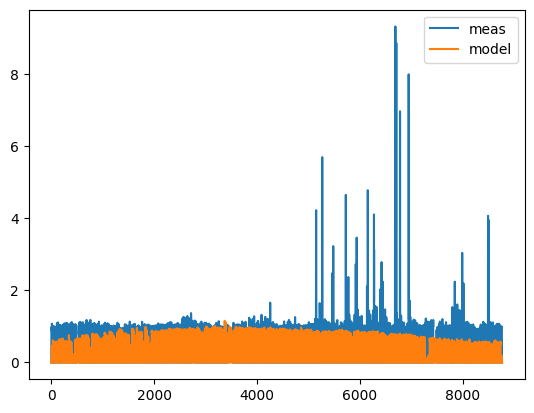

In [97]:
plt.plot(data.PR9.values, label='meas')
plt.plot(df.loc[df['Sim'] == '00']['Power9'].values, label='model')
plt.legend()

(0.0, 1.2)

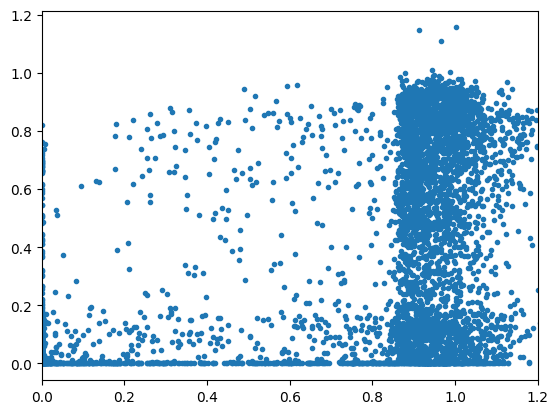

In [98]:
plt.plot(data.PR9.values, df.loc[df['Sim'] == '00']['Power9'].values, '.')
plt.xlim([0, 1.2])